# Metoda Najmniejszych Kwadratów
W roku 1801 astronomowie zgubili z oczu asteroidę i chodziło o to, by odszukać ją z powrotem na niebie. 

Gauss stworzył MNK (Metoda Najmniejszych Kwadratów) właśnie w celu jej odszukania, co mu się udało – znalazła się dokładnie tam, gdzie Gauss przewidział, że będzie.


PROSTY MODEL

Uproszczona sytuacja - wiemy, że dane ciało porusza się ruchem jednostajnym
$$y(x)=a x+b$$
Mamy chwile czasowe $x_1,\ldots,x_n$ w których dokonaliśmy obserwacji $y_1,\ldots,y_n$. Co więcej, zawsze dokonując obserwacji mamy jakiś błąd pomiarowy:
$$
y_i = a x_i+b+error_i
$$
Jeżeli założymy, że błąd pomiarowy pochodzi z rozkładu normalnego o $N(0,\sigma)$ (o ustalonej wartości $\sigma$) to możemy napisać
$$
error_i =y_i-ax_i-b \sim N(0,\sigma).
$$
Pomysł Gaussa bazuje na log-likelihood, będziemy szukać takich parametrów $a,b$ by sumaryczny log-likelihood błędów był najmniejszy:
$$
LL=\sum_i LogLikelihoodN(0,\sigma)(error_i)
$$
$$
=\sum_i -\frac{1}{2}\log(2 \pi \sigma^2)-\frac{1}{2}error_i^2/\sigma^2
$$
$$
=-\frac{n}{2}\log(2\pi \sigma^2)-\frac{1}{2\sigma_2}\sum_i error_i^2.
$$
Czyli maksymalizacja log-likelihood jest równoważna minimalizacji
$$
SquarredError=\sum_i error_i^2.
$$

Rozważmy prosty przykład dla konkretnych danych.

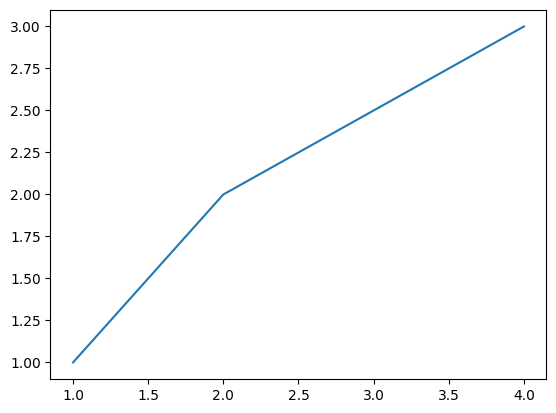

In [1]:
import numpy as np
# dane
x=np.array([1,2,4])
y=np.array([1,2,3])
import matplotlib.pyplot as plt

plt.plot(x,y)

In [2]:
# funkcja błędu
def SquarredError(x,y,a,b):
    SE=0.0
    for i in range(len(x)):
        SE+=(y[i]-a*x[i]-b)**2
    return(SE)
    

In [3]:
#parametry
a=0.8
b=0.1

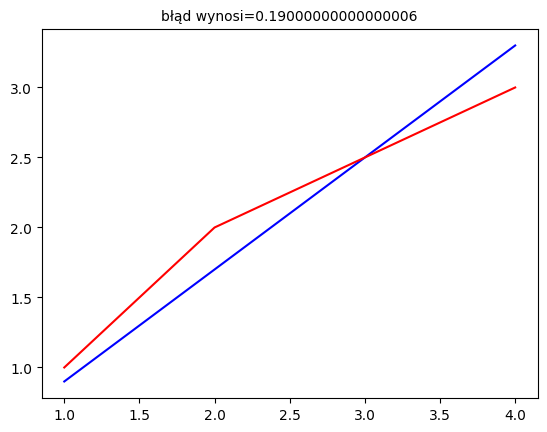

In [4]:
#błąd

def rysowanie(x,y,a,b):
    blad="błąd wynosi="+str(SquarredError(x,y,a,b))
    # porównanie na rysunku
    l=a*x+b
    plt.plot(x,l,'b')
    plt.plot(x,y,'r')
    plt.title(blad, size=10)
    plt.show()

rysowanie(x,y,a,b)

Różniczkując i przyrównując do zera, otrzymujemy, że
$$
SE(a,b) = \sum ( y_i - (ax_i+b) )^2.
$$
przyjmuje minimum gdy
$$
a=\frac{\sum y_i x_i - b \sum x_i}{ \sum x_i^2}
$$
oraz 
$$
b =\frac{\sum y_i - a \sum x_i}{ n }. 
$$

Moglibyśmy w ten sposób łatwo wyliczyć optymalne rozwiązanie, ale zastosujemy ogólniejsze podejście.

TWIERDZENIE

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą, która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.
Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia:
$$
w_0 = \mathrm{argmin} \{ w \in \mathbb{R}^K   \colon \| Aw - y \|^2 \}
$$
wtedy i tylko wtedy gdy:
$$
A^TA w_0 = A^Ty.
$$
Finalnie, jeżeli macierz $A^TA$ jest odwracalna, dostajemy
$$
w_0=(A^TA)^{-1}A^Ty.
$$

Wróćmy do naszego przykładu:
$$
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
\end{bmatrix}
\begin{bmatrix}
b\\
a\\
\end{bmatrix}
\approx
\begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
$$
czyli:

$$
\begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 4\\
\end{bmatrix}
\begin{bmatrix}
b\\
a\\
\end{bmatrix}
\approx
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix}
$$
Aby znaleźć optymalne przybliżenie, mnożymy obie strony przez $A^T$ dostając równanie:
$$
\begin{bmatrix}
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix}
\begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 4\\
\end{bmatrix}
\begin{bmatrix}
b\\
a\\
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix}
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix}
$$
czyli rozwiązujemy:

$$
\begin{bmatrix}
3 & 7\\
7 & 21\\
\end{bmatrix}
\begin{bmatrix}
b\\
a\\
\end{bmatrix}
=
\begin{bmatrix}
6\\
17\end{bmatrix}
$$

In [5]:
import numpy.linalg as alg 

def MSE(x,y):
    A=np.hstack((np.ones((len(x),1)),x.reshape(-1,1)))
    w_0=alg.inv(A.T@A)@(A.T@y.reshape(-1,1))
    b=w_0[0][0]
    a=w_0[1][0]
    return a,b

SquarredError(x,y,a,b)

0.19000000000000006

In [6]:
print(b)

0.1


Zróbmy sobie teraz przykład, gdy wygenerujemy $y$ za pomocą liniowej plus błąd, i zobaczymy na ile uda się odzyskać prawidłowe wartości parametrów.

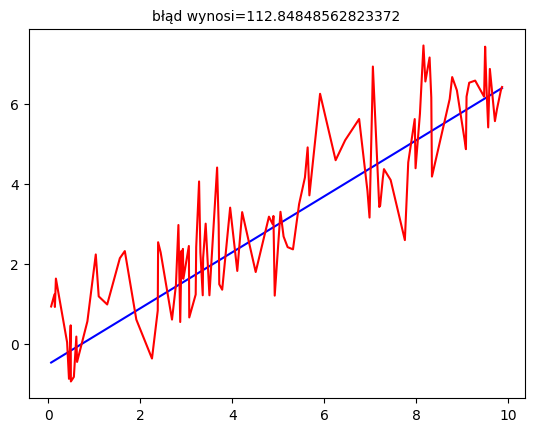

In [7]:
n=100
x=10*np.random.rand(n)
x.sort()
a,b=0.7,-0.5
y=a*x+b+np.random.randn(n)

rysowanie(x,y,a,b)

In [8]:
a,b=MSE(x,y)
print(a,b)
SquarredError(x,y,a,b) #lekki overfitting

0.6558688435017571 0.01995873141587164


102.18671979181825

ZADANIE: proszę wyliczyć jaką funkcję byśmy minimalizowali, gdyby błąd pochodził z rozkładu Laplace'a (podwójnie wykładniczy) $Laplace(m,\lambda)(x)=\lambda/2 \exp(-\lambda|x-m|)$, dla $\lambda=1$, $m=0$. Czy da się rozwiązać analitycznie?

PODSUMOWANIE:

Ponieważ równanie regresji liniowej jest stworzone w celu zminimalizowania sumy kwadratowej reszt (residua), regresja liniowa czasami nazywana jest $\text{\it Ordinary Least-Squares (OLS) Regression}$

Zauważmy, że w przeciwieństwie do korelacji związek między $x$ i $y$ nie jest symetryczny: zakłada się, że wartości $x$ są dokładnie znane, a zmienna $y$ jest tylko przybliżeniem.

## Regresja wielomianowa

### Simple Linear Regression

Załóżmy, że mamy kilka punktów $(x_i,y_i)$, gdzie $i=1,2,\ldots,n$ (dla przykładu $n=7$).

Wtedy najprostszy model regresji liniowej ma postać:
$$
y_i = \beta_0 + \beta_1x_i+\epsilon_i.
$$

Taki model można zapisać w postaci
$$
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
y_6\\
y_7\\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
1 & x_4\\
1 & x_5\\
1 & x_6\\
1 & x_7\\
\end{bmatrix}
\begin{bmatrix}
\beta_1\\
\beta_2\\
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\epsilon_3\\
\epsilon_4\\
\epsilon_5\\
\epsilon_6\\
\epsilon_7\\
\end{bmatrix},
$$
gdzie pierwsza kolumna w macierzy reprezentuje przesunięcie, a druga kolumna to wartości $x_i$ odpowiada nachyleniu.


A co jeżeli zależność jest bardziej skomplikowana? 

### Funkcje kwadratowe

Kwadratowe dopasowanie do danych jest dane modelem:
$$
y_i = \beta_0 + \beta_1x_i + \beta_2 x_i^2+\epsilon_i.
$$
W postaci macierzowej mamy:
$$
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
y_6\\
y_7\\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
1 & x_3 & x_3^2\\
1 & x_4 & x_4^2\\
1 & x_5 & x_5^2\\
1 & x_6 & x_6^2\\
1 & x_7 & x_7^2\\
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\epsilon_3\\
\epsilon_4\\
\epsilon_5\\
\epsilon_6\\
\epsilon_7\\
\end{bmatrix},
$$

UWAGA:
Zauważ, że nieznane parametry $\beta_i$ pojawiają się liniowo, a składniki macierzy pojawiają się z kwadratami.

Analogicznie zachodzi, gdy mamy wielomiany wyższych rzędów.


In [22]:
def RegresjaWielomianowa(x,y,n):
    A=np.ones((len(x),1))
    for i in range(n):
        A=np.hstack((A,x.reshape(-1,1)**(i+1)))
    return(alg.inv(A.T @ A)@(A.T @ y.reshape(-1,1)))




                         

In [27]:
stopien=20

xw=np.linspace(x.min(),x.max(),100)
yw=np.zeros(100)
wsp=RegresjaWielomianowa(x,y,stopien)
print(wsp)

for i in range(len(wsp)):
    yw+=wsp[i]*xw**i

[[-2.63015071e+03]
 [ 3.28486118e+03]
 [-1.90762775e+03]
 [ 6.89630310e+02]
 [-2.01299072e+02]
 [ 5.37612000e+01]
 [-1.11150780e+01]
 [ 1.25616932e+00]
 [ 1.34228766e-02]
 [-2.07932889e-02]
 [ 1.30110979e-03]
 [ 1.90988416e-04]
 [-2.99574749e-05]
 [ 1.91719482e-06]
 [-1.88359309e-07]
 [ 1.09831433e-08]
 [ 8.57623306e-10]
 [ 1.60430280e-11]
 [-2.63848665e-11]
 [ 2.28391091e-12]
 [-5.99439660e-14]]


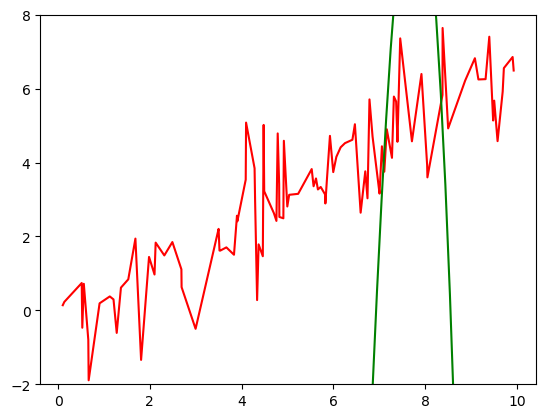

In [28]:
plt.plot(x,y,'r')
plt.plot(xw,yw,'g')
plt.ylim(-2,8)
plt.show()

# Model wielowymiarowy

W przypadku danych z $\mathbb{R}^D$ bardzo ogólna definicja modelu regresji jest następująca:
$$
f(x^i,\omega) \approx y_i \text{ dla }x^i \in \mathbb{R}^D,
$$
gdzie $\omega \in \Omega$ dopuszczalna przestrzeń parametrów.

Rozważmy funkcję liniową postaci
$$
y=\beta_1x_1+\ldots+\beta_n x+b=\beta^T x+b.
$$
Model może zostać zapisany jako:
$$
x_i^T \beta+b \approx y_i.
$$
Rozważmy najpierw sytuację $b=0$. 
Wtedy możemy powyższe zapisać jako
$$
X^T \beta \approx y^T. 
$$
I to możemy rozwiązać za pomocą wcześniej opisanego rozwiązania macierzowego.

Dla danych w postaci: 
$$
\{x_i=(x_{i1},\ldots ,x_{ip})\}_{i=1}^{n} \subset \mathbb{R}^D, 
\, y_i \in \mathbb{R}
$$
mówimy, że $y_i$ jest zmienną objaśnianą, a $x_{i1},\ldots ,x_{ip}$  są zmiennymi objaśniającymi, a model regresji ma postać:
$$
{\displaystyle y_{i}=\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf{x} _{i}^{T }{\boldsymbol {\beta }},\qquad i=1,\ldots ,n,}
$$
gdzie $^{T}$ oznacza transpozycję, a $\mathbf{x}_{i}^T\beta$ oznacza iloczyn skalarny.

Jeżeli dopuszczamy niezerowe $b$, możemy tak jak w przypadku wielomianowej zrobić nowe punkty $\bar x_i=(x_i,1)$, rozwiązać dla nich, i ostatni parametr będzie odpowiadał wartości $b$.


PODSUMOWANIE:

Założenia regresji liniowej:
* zależność jest liniowa,
* brak znaczących obserwacji odstających,
* homoscedastyczność – wariancja reszt składnika losowego
jest taka sama dla wszystkich obserwacji,
* reszty mają rozkład zbliżony do rozkładu normalnego.


# Dopasowanie

``Zmienność'' zbioru możemy mierzyć różnymi miarami:
* Model Sum of Squares (Explained Sum of Squares)
$$
SS_{mod} = \sum_{i=1}^{n} (\hat y_i - \bar y)^2
$$
* Residuals Sum of Squares (sum of squares for the errors)
$$
SS_{res} = \sum_{i=1}^{n} (y_i - \hat y_i)^2
$$
* Total Sum of Squares (równoważna wariancji próbki pomnożonej przez ($n-1$)).
$$
SS_{tot} = \sum_{i=1}^{n} (y_i - \bar y)^2
$$

Dla modelu regresji liniowej mamy:
$$
SS_{mod} + SS_{res} = SS_{tot}.
$$
Przy powyższych oznaczeniach  **współczynnik determinacji** (coefficient of determination) oznaczmy $R^2$:
$$
R^2 = 1-\frac{SS_{res}}{SS_{tot}} = \frac{SS_{model}}{SS_{tot}}.
$$

Współczynnik determinacji, to stosunek sumy kwadratów odległości zmiennej wyjaśnianej przez model do całkowitej sumy kwadratów. Dla regresji liniowej, współczynnik determinacji jest kwadratem współczynnika korelacji $R$. 

Wartości $R^2$ zbliżone do $1$ odpowiada ścisłej korelacji, wartości zbliżone do $0$ odpowiada słabej:
* 0,0 - 0,5 - dopasowanie niezadowalające,
* 0,5 - 0,6 - dopasowanie słabe,
* 0,6 - 0,8 - dopasowanie zadowalające,
* 0,8 - 0,9 - dopasowanie dobre,
* 0,9 - 1,0 - dopasowanie bardzo dobre.

Zauważmy, że dla modeli ogólnych często pisze się $R^2$, podczas gdy dla prostej regresji liniowej $r^2$.
